# CDC Diabetes Health Indicators

## Problem Statement
Diabetes is a growing health concern worldwide, with significant implications for public health systems. In Kenya, the prevalence of diabetes is increasing, particularly in urban areas. There is a need to understand the relationship between lifestyle factors and diabetes to develop effective interventions. This project aims to analyze the CDC Diabetes Health Indicators Dataset to identify key risk factors for diabetes and provide actionable insights to improve diabetes care and prevention in Kenya.

## Business Understanding
The primary objective of this project is to better understand the relationship between lifestyle and diabetes in the US using the CDC Diabetes Health Indicators Dataset. This topic is of particular interest due to the rising prevalence of diabetes in Kenya, especially in urban areas. By studying this data, we aim to create awareness about diabetes and develop interventions to reduce the prevalence of risk factors for kidney failure and improve diabetes care in Kenya. This project applies to the Health and Medicine domain and targets the Ministry of Health, teaching institutions, Non-Governmental Organizations, the private sector, and teaching hospitals in Kenya. If successful, this analysis could significantly impact by raising awareness and guiding interventions to improve diabetes care and reduce related health risks.

## Data Understanding
We will collect data on diabetes diagnosis, demographics (race, sex), personal information (income, education), and health history (drinking, smoking, mental health, physical health). The raw data is sourced from [Kaggle's Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset) and is available for download and public use. The features include integer and binary variables, and the dataset does not contain missing values. We will handle data preprocessing tasks such as encoding categorical variables and scaling numerical features while addressing data privacy and managing any inconsistent data.


In [17]:
import pandas as pd

# Load the dataset
file_path = 'diabetes_012_health_indicators_BRFSS2015.csv.xls'
data = pd.read_csv(file_path)

# Display the first few rows and summary of the dataset
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

(   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
 0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
 1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
 2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
 3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
 4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   
 
    HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
 0                   0.0           0.0     0.0  ...            1.0   
 1                   0.0           1.0     0.0  ...            0.0   
 2                   0.0           0.0     1.0  ...            1.0   
 3                   0.0           1.0     1.0  ...            1.0   
 4                   0.0           1.0     1.0  ...            1.0   
 
    NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
 0          0.0      5.0      18.0      15.0       1.0  0.0   9.0     

In [19]:
# DATA CLEANING
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
duplicate_rows

23899

In [20]:
# Remove duplicate rows
data = data.drop_duplicates()

# Standardize column names
data.columns = [col.strip().lower() for col in data.columns]
data_types = data.dtypes

# Display the number of rows and columns after removing duplicates and the data types
data.shape, data_types

((229781, 22),
 diabetes_012            float64
 highbp                  float64
 highchol                float64
 cholcheck               float64
 bmi                     float64
 smoker                  float64
 stroke                  float64
 heartdiseaseorattack    float64
 physactivity            float64
 fruits                  float64
 veggies                 float64
 hvyalcoholconsump       float64
 anyhealthcare           float64
 nodocbccost             float64
 genhlth                 float64
 menthlth                float64
 physhlth                float64
 diffwalk                float64
 sex                     float64
 age                     float64
 education               float64
 income                  float64
 dtype: object)

In [21]:
data.head(30)

,diabetes_012,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,...,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


The dataset now has 229,781 rows and 22 columns after removing duplicates. All columns are of type float64, which is appropriate for the numerical variables in this dataset.

In [22]:
#Change the name of 'diabetes_012' column to "Diabetes_binary" since it indicates whether a person has diabetes (1) or not (0).
data = data.rename(columns={'diabetes_012': 'Diabetes_binary'})
data.head()

,Diabetes_binary,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,...,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


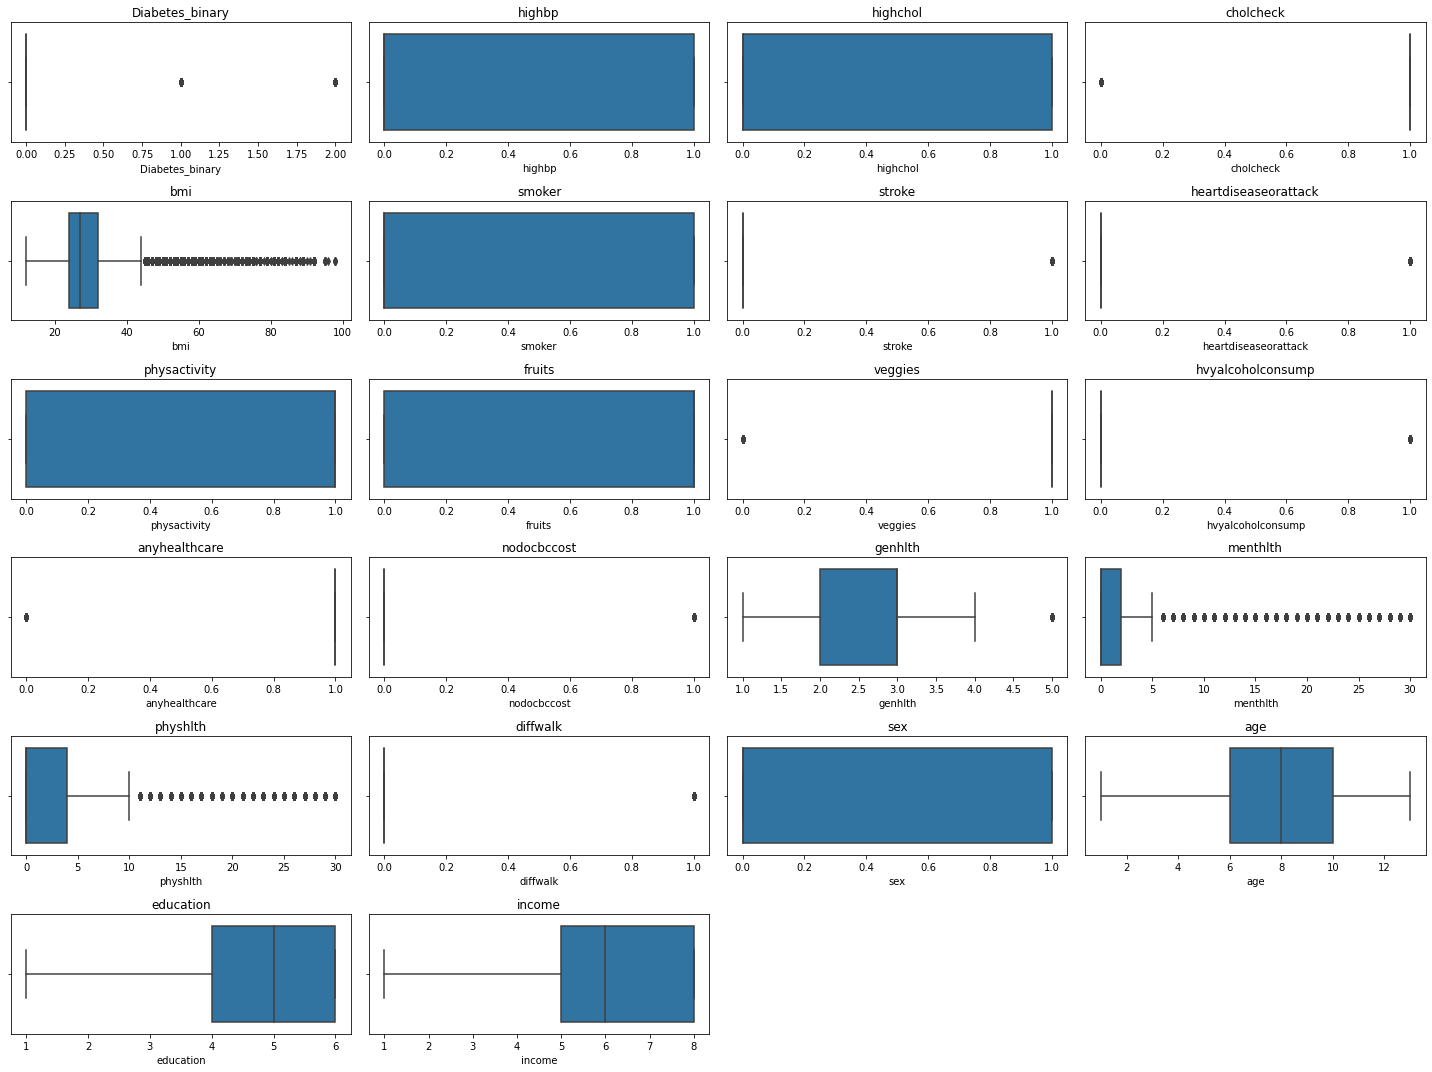

In [23]:
#Identifying Outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
for i, column in enumerate(data.columns):
    plt.subplot(6, 4, i+1)
    sns.boxplot(x=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()


In [24]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,229781.0,0.325627,0.724623,0.0,0.0,0.0,0.0,2.0
highbp,229781.0,0.454441,0.497921,0.0,0.0,0.0,1.0,1.0
highchol,229781.0,0.441760,0.496598,0.0,0.0,0.0,1.0,1.0
cholcheck,229781.0,0.959535,0.197047,0.0,1.0,1.0,1.0,1.0
bmi,229781.0,28.685670,6.786360,12.0,24.0,27.0,32.0,98.0
smoker,229781.0,0.465661,0.498821,0.0,0.0,0.0,1.0,1.0
stroke,229781.0,0.044756,0.206767,0.0,0.0,0.0,0.0,1.0
heartdiseaseorattack,229781.0,0.103216,0.304241,0.0,0.0,0.0,0.0,1.0
physactivity,229781.0,0.733355,0.442206,0.0,0.0,1.0,1.0,1.0
fruits,229781.0,0.612966,0.487073,0.0,0.0,1.0,1.0,1.0


In [26]:
diabetes_distribution = data['Diabetes_binary'].value_counts()

diabetes_distribution

0.0    190055
2.0     35097
1.0      4629
Name: Diabetes_binary, dtype: int64

Diabetes Distribution
The Diabetes_binary column indicates whether a person has diabetes (1) or not (0).

No Diabetes (0): 215,909 occurrences (85.11%)

Diabetes (1) and (2): 37,771 occurrences (14.89%)

This distribution indicates that the dataset is imbalanced, with a significantly larger proportion of non-diabetic individuals compared to diabetic ones.